A hepatite é a inflamação do fígado. Pode ser causada por vírus ou pelo uso de alguns remédios, álcool e outras drogas, assim como por doenças autoimunes, metabólicas e genéticas. Em alguns casos, são doenças silenciosas que nem sempre apresentam sintomas.

As hepatites virais são inflamações causadas por vírus que são classificados por letras do alfabeto em A, B, C, D (Delta) e E. No Brasil, mais de 70% (23.070) dos óbitos por hepatites virais são decorrentes da Hepatite C, seguido da Hepatite B (21,8%) e A (1,7%). O país registrou 40.198 casos novos de hepatites virais em 2017.  

Informações dos atributos

1. CLASSE: DIE, LIVE 
2. IDADE: 10, 20, 30, 40, 50, 60, 70, 80 
3. SEXO: homem, mulher 
4. ESTEROIDE: não, sim
5. ANTIVIRAIS: não, sim
6. FADIGA: não, sim 
7. MAL ESTAR: não, sim
8. ANOREXIA: não, sim 
9. FIGADO GRANDE: não, sim
10. FIGADO FIRME: não, sim 
11. BAÇO PALPAVEL: não, sim 
12. SPIDERS: não, sim 
13. ASCITE: não, sim 
14. VARIZE: não, sim 
15. BILIRUBINA: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- see the note below 
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250 
17. SGOT: 13, 100, 200, 300, 400, 500, 
18. ALBUMINA: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90 
20. HISTOLOGIA: não, sim 

Sobre o banco de dados de hepatite e o problema de BILIRUBIN, gostaria de dizer o seguinte: BILIRUBIN é atributo contínuo (= o número de seus "valores" no arquivo ASDOHEPA.DAT é negativo !!!); "valores" são citados porque, ao falar sobre o atributo contínuo, não existem todos os valores possíveis.

No entanto, eles representam os chamados valores de "limite"; de acordo com esses valores de "limite", o atributo pode ser discretizado. Ao mesmo tempo, devido ao atributo contínuo, pode-se executar outro teste, pois as informações contínuas são preservadas. Espero que essas linhas tenham respondido pelo menos aproximadamente à sua pergunta.

https://archive.ics.uci.edu/ml/datasets/hepatitis

In [1]:
import pandas as pd
import numpy as np

In [2]:
cols_name = ['Classe', 'Idade','Sexo', 'Esteroide', 'Antivirais','Fadiga','Mal-estar','Anorexia','FigadoGrande',
                'FigadoFirme','BacoPalpavel','Aranhas','Ascite','Varizes','Bilirubina','AlkPhosphate','SGOT',
                'Albumina','Protime','Histologia']
num_cols = ['Idade', 'Bilirubina','AlkPhosphate','SGOT','Albumina','Protime']
cat_cols = ['Classe','Sexo', 'Esteroide', 'Antivirais','Fadiga','Mal-estar','Anorexia','FigadoGrande',
                'FigadoFirme','BacoPalpavel','Aranhas','Ascite','Varizes','Histologia']

In [3]:
dataset = pd.read_csv('dados/hepatite.data', 
                             names = cols_name, 
                             sep = ',', 
                             na_values='?',
                             encoding = 'latin-1')

In [4]:
dataset.head(20)

,Classe,Idade,Sexo,Esteroide,Antivirais,Fadiga,Mal-estar,Anorexia,FigadoGrande,FigadoFirme,BacoPalpavel,Aranhas,Ascite,Varizes,Bilirubina,AlkPhosphate,SGOT,Albumina,Protime,Histologia
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
6,1,51,1,1.0,2,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1
7,2,23,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1
8,2,39,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.7,NaN,48.0,4.4,NaN,1
9,2,30,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,120.0,3.9,NaN,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Classe          155 non-null int64
Idade           155 non-null int64
Sexo            155 non-null int64
Esteroide       154 non-null float64
Antivirais      155 non-null int64
Fadiga          154 non-null float64
Mal-estar       154 non-null float64
Anorexia        154 non-null float64
FigadoGrande    145 non-null float64
FigadoFirme     144 non-null float64
BacoPalpavel    150 non-null float64
Aranhas         150 non-null float64
Ascite          150 non-null float64
Varizes         150 non-null float64
Bilirubina      149 non-null float64
AlkPhosphate    126 non-null float64
SGOT            151 non-null float64
Albumina        139 non-null float64
Protime         88 non-null float64
Histologia      155 non-null int64
dtypes: float64(15), int64(5)
memory usage: 24.3 KB


In [6]:
dataset.describe()

,Classe,Idade,Sexo,Esteroide,Antivirais,Fadiga,Mal-estar,Anorexia,FigadoGrande,FigadoFirme,BacoPalpavel,Aranhas,Ascite,Varizes,Bilirubina,AlkPhosphate,SGOT,Albumina,Protime,Histologia
count,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [7]:
dataset.Classe.value_counts()

2    123
1     32
Name: Classe, dtype: int64

In [8]:
dataset[num_cols] = dataset[num_cols].astype(float)
dataset[cat_cols] = dataset[cat_cols].astype(object)

In [9]:
dataset.describe()

,Idade,Bilirubina,AlkPhosphate,SGOT,Albumina,Protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123f300d0>]],
      dtype=object)

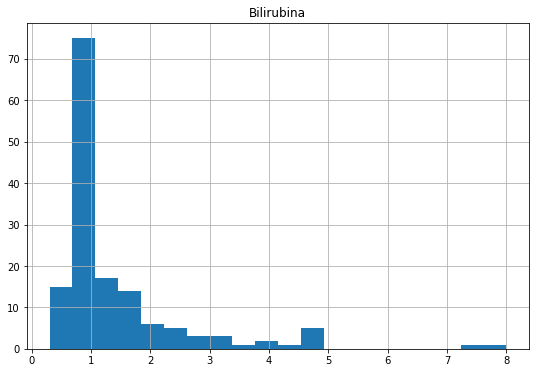

In [12]:
import matplotlib.pyplot as plt 
dataset.hist(column = 'Bilirubina', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1240f1e90>]],
      dtype=object)

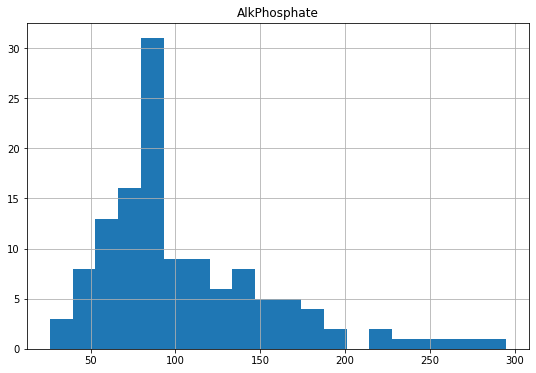

In [13]:
dataset.hist(column = 'AlkPhosphate', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124312e50>]],
      dtype=object)

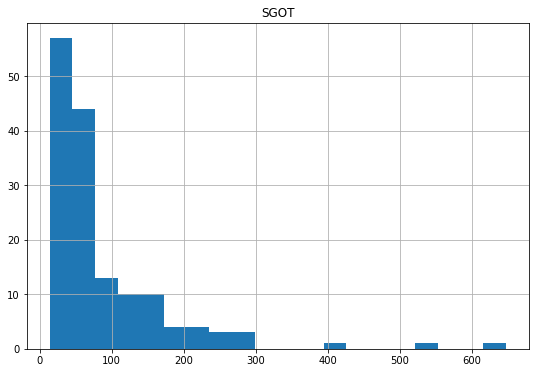

In [14]:
dataset.hist(column = 'SGOT', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12430a0d0>]],
      dtype=object)

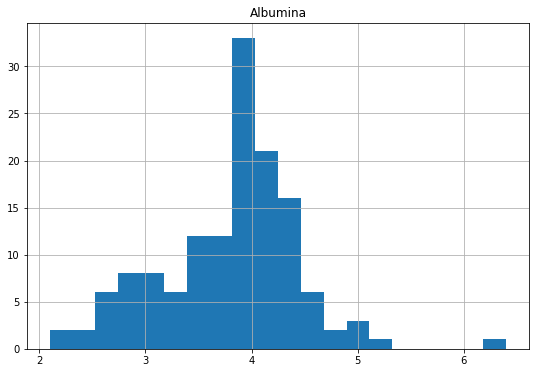

In [16]:
dataset.hist(column = 'Albumina', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12460e910>]],
      dtype=object)

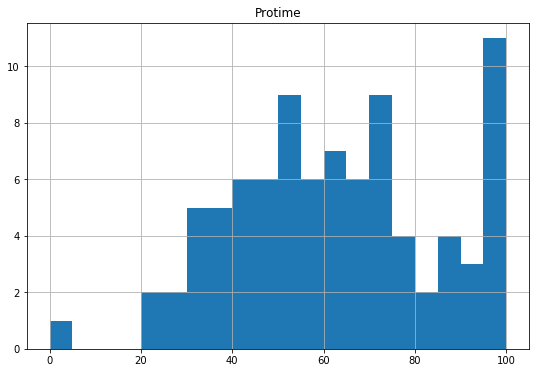

In [17]:
dataset.hist(column = 'Protime', figsize=(9,6), bins=20)

In [21]:
#BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- see the note below 
dataset = dataset[(dataset['Bilirubina'] > 0.39) & (dataset['Bilirubina'] <= 4.0)]

#ALK PHOSPHATE: 33, 80, 120, 160, 200, 250 
dataset = dataset[(dataset['AlkPhosphate'] > 33) & (dataset['AlkPhosphate'] <= 250)]

#SGOT: 13, 100, 200, 300, 400, 500,
dataset = dataset[(dataset['SGOT'] > 13) & (dataset['SGOT'] <= 500)]

#ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 
dataset = dataset[(dataset['Albumina'] > 2.1) & (dataset['Albumina'] <= 6.0)]

#PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90 
dataset = dataset[(dataset['Protime'] > 10) & (dataset['Protime'] <= 90)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32ff6ad0>]],
      dtype=object)

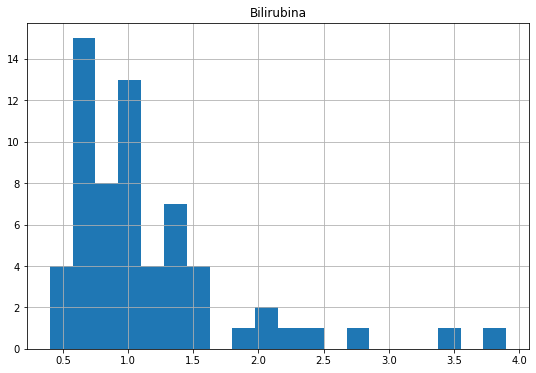

In [22]:
dataset.hist(column = 'Bilirubina', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3389cbd0>]],
      dtype=object)

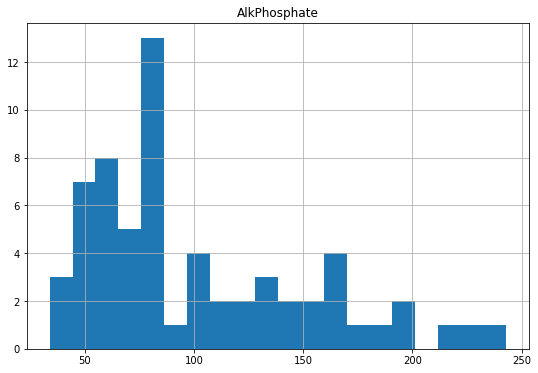

In [23]:
dataset.hist(column = 'AlkPhosphate', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36e1c210>]],
      dtype=object)

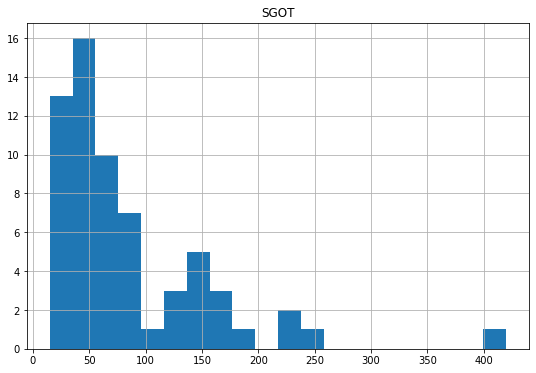

In [24]:
dataset.hist(column = 'SGOT', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36f32910>]],
      dtype=object)

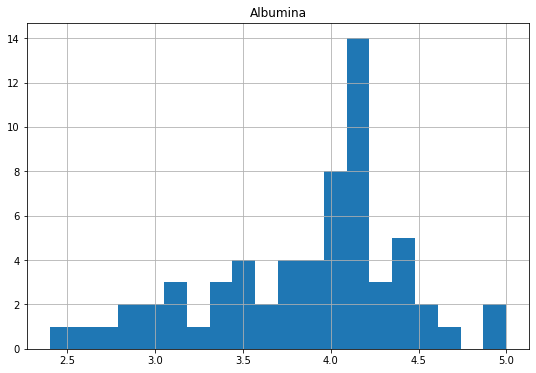

In [25]:
dataset.hist(column = 'Albumina', figsize=(9,6), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36e3dd90>]],
      dtype=object)

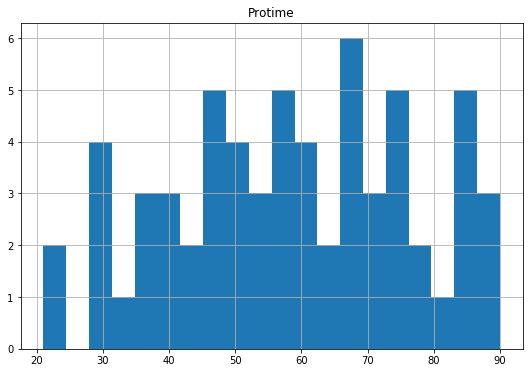

In [26]:
dataset.hist(column = 'Protime', figsize=(9,6), bins=20)

In [27]:
dataset.isnull().sum()

Classe          0
Idade           0
Sexo            0
Esteroide       1
Antivirais      0
Fadiga          0
Mal-estar       0
Anorexia        0
FigadoGrande    1
FigadoFirme     1
BacoPalpavel    0
Aranhas         0
Ascite          0
Varizes         0
Bilirubina      0
AlkPhosphate    0
SGOT            0
Albumina        0
Protime         0
Histologia      0
dtype: int64

In [28]:
novo_bili = np.where(dataset['Bilirubina'].isnull(), dataset['Bilirubina'].mean(), dataset['Bilirubina'])

In [29]:
dataset['Bilirubina'] = novo_bili

In [30]:
novo_alkp = np.where(dataset['AlkPhosphate'].isnull(), dataset['AlkPhosphate'].mean(), dataset['AlkPhosphate'])

In [31]:
dataset['AlkPhosphate'] = novo_alkp

In [32]:
novo_sgot = np.where(dataset['SGOT'].isnull(), dataset['SGOT'].mean(), dataset['SGOT'])

In [33]:
dataset['SGOT'] = novo_sgot

In [34]:
novo_alb = np.where(dataset['Albumina'].isnull(), dataset['Albumina'].mean(), dataset['Albumina'])

In [35]:
dataset['Albumina'] = novo_alb

In [36]:
novo_prot = np.where(dataset['Protime'].isnull(), dataset['Protime'].mean(), dataset['Protime'])

In [37]:
dataset['Protime'] = novo_prot

In [38]:
dataset.isnull().sum()

Classe          0
Idade           0
Sexo            0
Esteroide       1
Antivirais      0
Fadiga          0
Mal-estar       0
Anorexia        0
FigadoGrande    1
FigadoFirme     1
BacoPalpavel    0
Aranhas         0
Ascite          0
Varizes         0
Bilirubina      0
AlkPhosphate    0
SGOT            0
Albumina        0
Protime         0
Histologia      0
dtype: int64